#Logistic Regression Implementation Through sklearn

##Loading Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import math

##Loading dataset

In [ ]:
df = pd.read_csv("Data.csv",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS'] 

##Standardize the Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


##Splitting data into train, test and cross validation set

In [ ]:
X = scaled_features
y = df['TARGET CLASS']

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2)

print('Total number of datapoints in the dataset:',X.shape[0])

print('Number of datapoints in Training data: {}({:.2f}%)'.
      format(X_tr.shape[0],(X_tr.shape[0]/X.shape[0])*100))

print('Number of datapoints in Cross Validation data: {}({:.2f}%)'.
      format(X_cv.shape[0],(X_cv.shape[0]/X.shape[0])*100))

print('Number of datapoints in Test Data: {}({:.2f}%)'.
      format(X_test.shape[0],(X_test.shape[0]/X.shape[0])*100))

Total number of datapoints in the dataset: 1000
Number of datapoints in Training data: 560(56.00%)
Number of datapoints in Cross Validation data: 140(14.00%)
Number of datapoints in Test Data: 300(30.00%)


#Logistic Regression model building along with hyperparameter tuning for the optimal 'C', using AUC value

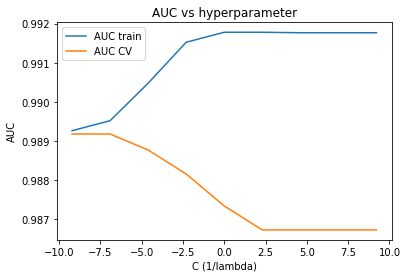

Optimal lambda for which auc is maximum :  9999.0


In [ ]:
auc_train=[]
auc_cv=[]
C = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4] #C=1/lambda

for c in C:
    lr=LogisticRegression(penalty='l2',C=c)
    lr.fit(X_tr,y_tr)
    probcv=lr.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=lr.predict_proba(X_tr)[:,1]
    auc_train.append(roc_auc_score(y_tr,probtr))

optimal_c= C[auc_cv.index(max(auc_cv))]
C_log = [math.log(x) for x in C] #converting values of C into logarithm

#Plotting AUC
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C_log, auc_train, label='AUC train')
ax.plot(C_log, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()

optimal_c= C[auc_cv.index(max(auc_cv))]
print('Optimal lambda for which auc is maximum : ',1//optimal_c)

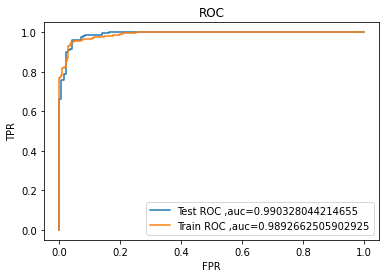

In [ ]:
#ROC for Lambda=1/C
lr=LogisticRegression(penalty='l2',C=optimal_c)
lr.fit(X_tr,y_tr)
predi=lr.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=lr.predict_proba(X_tr)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

##Evaluation metrics

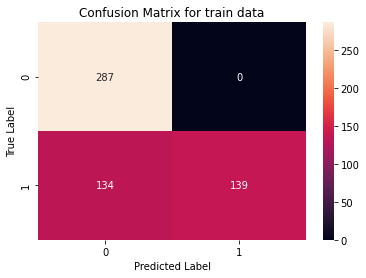



-------------------- Metric report for train data --------------------

               precision    recall  f1-score   support

           0       0.68      1.00      0.81       287
           1       1.00      0.51      0.67       273

    accuracy                           0.76       560
   macro avg       0.84      0.75      0.74       560
weighted avg       0.84      0.76      0.74       560



In [ ]:
#Confusion matrix using heatmap for train data

lr=LogisticRegression(penalty='l2',C=optimal_c)
lr.fit(X_tr,y_tr)
predic=lr.predict(X_tr)

conf_mat = confusion_matrix(y_tr, predic)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print('\n')
print('-'*20,'Metric report for train data','-'*20)
print('\n',classification_report(y_tr,predic))

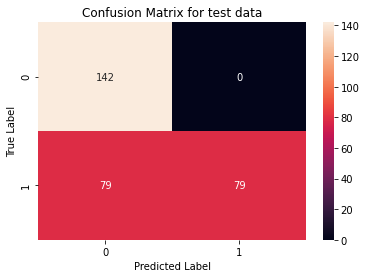



-------------------- Metric report for test data --------------------

               precision    recall  f1-score   support

           0       0.64      1.00      0.78       142
           1       1.00      0.50      0.67       158

    accuracy                           0.74       300
   macro avg       0.82      0.75      0.72       300
weighted avg       0.83      0.74      0.72       300



In [ ]:
#Confusion matrix using heatmap for test data

lr=LogisticRegression(penalty='l2',C=optimal_c)
lr.fit(X_tr,y_tr)
predic=lr.predict(X_test)

conf_mat = confusion_matrix(y_test, predic)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print('\n')
print('-'*20,'Metric report for test data','-'*20)
print('\n',classification_report(y_test,predic))